In [138]:
#Lecturer Name: Dr Aznul Qalid Bin Md Sabri 

#Group Name: RG

#Group Members :

#Reem Idres (S2128921) ---Occurence 1
#Musa Khan  (S2041393) ---Occurence 4
#Arham Hossain (S2121048) ---Occurence 3
#Satryo Daffa Pradhana (S2110822) ---Occurence 2
#Mohamed Taha  (S2034212) ---Occurence 4

In [141]:
print("...................................Depression Indicator............................................")

...................................Depression Indicator............................................


In [87]:
import numpy as np
import pandas as pd

import xgboost

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [88]:
#1.Read the depression dataset

In [90]:
path='Downloads\depressiondataset3Copy.csv'
dataset = pd.read_csv(path)
dataset

,Weight loss/lack of appetite,Social/Anti-social,Vitamin deficiency,Productivity level,Performance in academic life,Probability of Depression,Depress,Class of Depression
0,1,1,1,0.0,0.0,1.0,1,severe
1,1,1,0,0.1,1.0,0.9,1,severe
2,1,1,1,0.0,0.0,1.0,1,severe
3,1,1,0,0.2,1.0,0.4,1,mild
4,1,1,0,0.0,0.0,0.9,1,severe
...,...,...,...,...,...,...,...,...
584,1,0,1,0.3,0.2,0.3,1,Mild
585,0,1,0,0.4,0.1,0.2,1,Mild
586,1,1,0,0.5,0.4,0.0,0,None
587,0,1,1,0.3,0.2,0.7,1,Severe


In [143]:
print("According to the outcome, we recommend people diagnosed with mild depression to:\n"+
       "1.Socialise more\n"+
       "2.Open about it to their family members\n" +
       "3.Involve meditation,excercise regularly into thier lifestyle\n"+
       "4.Get more sun exposure\n" +
       "5.Join Mental Health Improvement classes\n")    

According to the outcome, we recommend people diagnosed with mild depression to:
1.Socialise more
2.Open about it to their family members
3.Involve meditation,excercise regularly into thier lifestyle
4.Get more sun exposure
5.Join Mental Health Improvement classes



In [142]:
print("According to the outcome, we recommend people diagnosed with severe depression to:\n"+
       "1.Go on regular therapy sessions\n"+
       "2.Try taking anti-depressant drugs, if dont want therapy sessions\n" +
       "3.Try to be have people around you most of the time to avoid the negative thoughts\n")      

According to the outcome, we recommend people diagnosed with severe depression to:
1.Go on regular therapy sessions
2.Try taking anti-depressant drugs, if dont want therapy sessions
3.Try to be have people around you most of the time to avoid the negative thoughts



In [91]:
#2.Divide dataset into training & validation dataset
#random selection on dataset: 20% under validation, 80% under training 

In [92]:
var_columns = [c for c in dataset.columns if c not in ['Depress','Class of Depression']]
X = dataset.loc[:, var_colums]
y = dataset.loc[:, 'Depress']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)# 
#20% of dataset is randomly selected to be part of validation dataset 
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((471, 6), (118, 6), (471,), (118,))

In [ ]:
#from this it can be seen that 471 rows are part of training dataset & reamining 118 are part of validation dataset.

In [95]:
#3.Create xgboost model

In [96]:
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [97]:
#set some of the hyperparameter values,such as the learning rate, max depth for each trees, no of trees at each depth,

In [98]:
#create an object of the class XGBClassifier 
model_xgboost = xgboost.XGBClassifier(
    learning_rate=0.1
    max_depth=5, 
    n_estimators=100, #model creates max :100 trees
    subsample=0.5, #50% of training dataset is randomly selected to create each tree;useful to prevent overfitting 
    colsample_bytree=0.5,#50% of features is randomly selected when a new tree is built
    eval_metric='auc',#model will be evaluated using area-under-the curve as a metric while model is being trained
    verbosity=1)

#evaluate the dataset while model is being trained-->x & y variables
eval_set = [(X_valid, y_valid)]
#call fit function to train model 
model_xgboost.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,#after 10 iterations of validation dataset,if model performance doesnt change, model stops & no more trees is built
    eval_set=eval_set,
    verbose=True)
                

[0]	validation_0-auc:0.69721
[1]	validation_0-auc:0.68374
[2]	validation_0-auc:0.68781
[3]	validation_0-auc:0.69204
[4]	validation_0-auc:0.70865
[5]	validation_0-auc:0.70175
[6]	validation_0-auc:0.70426
[7]	validation_0-auc:0.71632
[8]	validation_0-auc:0.72071
[9]	validation_0-auc:0.71632
[10]	validation_0-auc:0.69737
[11]	validation_0-auc:0.69831
[12]	validation_0-auc:0.69204
[13]	validation_0-auc:0.69330
[14]	validation_0-auc:0.69674
[15]	validation_0-auc:0.69424
[16]	validation_0-auc:0.70896
[17]	validation_0-auc:0.71209
[18]	validation_0-auc:0.71867


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [99]:
#total no of trees=18

In [100]:
#4. Evaluate model performance using AUC confusion matrix based on first iteration on the model.

In [101]:
#by using a function--->predict_proba , we can predict the training & validation dataset values.
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]
#pass our y variable which is 'Probability of Depression' to function roc_auc_score ; this gives the AUC confusion metric values
print("AUC for Training dataset: {:.4f}\nAUC for Validation dataset:+
      "{:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC for Training dataset: 0.7986
AUC for Validation dataset: 0.7207


In [ ]:
#5.Hyperparameter Tuning- to get the best parameters by using cross validation technique
#Performance on validation dataset will increase if we are able to tune our hyperparameter
#Three parameters are being used, which are:
#1. Learning rate list
#2. Max depth list
#3. no of estimators list
# The list of possible values of these hyperparameters has been transformed into a dictionary 
# because that's the format required by GridSearchCV

In [103]:
#initialise some hyperparameters:learning rate,max depth values, no of tree(estimators)
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 300]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print("Total combination of hyperparameters tried : ", num_combinations)
params_dict

Total combination of hyperparameters tried :  27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 300]}

In [104]:
#6.GridSearchCV is passed.A custom scoring function based on sklearn's roc_auc_score() which calculates area under the curve
#is used.
#CV value=2, meaning dataset is split into 2 parts for cross validation, and it will undergo 2 iteration
#each iteration is done on the training as well as validation dataset

In [105]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.886, test=0.695) total time=   0.5s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.752, test=0.865) total time=   0.6s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.900, test=0.709) total time=   1.1s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.760, test=0.864) total time=   1.1s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=300;, score=(train=0.865, test=0.678) total time=   0.1s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=300;, score=(train=0.720, test=0.860) total time=   0.1s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.889, test=0.695) total time=   0.5s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.756, test=0.864) total time=   0.5s
[CV 1

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [24]:
#7.Check the results of hyperparameter tuning
#cv_results to view the results
#Can be coverted into pandas dataframe 
#The useful columns has been kept out of this dataframe then sorted it by 'rank_test_score'

In [25]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
13,1,0.776920,0.834868,0.05,3,2000
16,2,0.776384,0.834925,0.05,5,2000
22,3,0.775878,0.835065,0.1,3,2000
10,4,0.774929,0.833208,0.05,2,2000
25,5,0.774583,0.836164,0.1,5,2000
1,6,0.774091,0.826021,0.02,2,2000
19,7,0.773991,0.835034,0.1,2,2000
4,8,0.772656,0.828406,0.02,3,2000
7,9,0.772009,0.829443,0.02,5,2000
9,10,0.771786,0.827788,0.05,2,1000


In [106]:
#8.Check how does the model performance vary with respect to the no of tree and depth of tree

Text(0.5, 1.0, 'Performance with respect to the no of Trees and Depth')

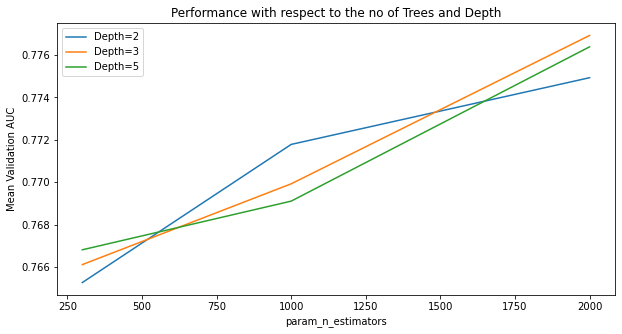

In [107]:
# First the number of estimators is sorted to be used as x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth, to figure out which depth creates 
#the max no of trees for the model
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]

# Plot of the Mean Validation AUC against the no of estimators
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)

plt.ylabel('Mean Validation AUC')
plt.title('Performance with respect to the no of Trees and Depth')

In [108]:
#from the plot above, it can be conlcuded that the best performance
#occurs when the Depth=3 and the no of trees is 2000.

In [109]:
#9.Check how the performance varies with the learning rate

Text(0.5, 1.0, 'Performance wrt learning rate')

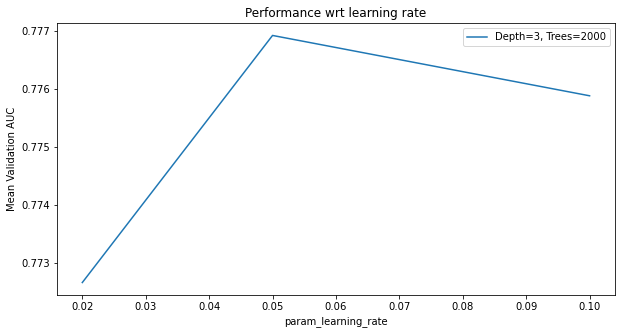

In [110]:
# The learning rate is first sorted to used as the x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate and different values of depth, when no of trees=2000
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==2000) & (df_cv_results['param_max_depth']==3),:]

# A plot of Mean Validation AUC against Performance with respect to AUC
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=3, Trees=2000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [111]:
#From the graph above, the best learning rate is around 0.05. 

# Final model

In [ ]:
#10.Build xgboost classifier using the best Hyperparameters found

In [ ]:
#create the final model using the best values of learning rate, max depth and no of trees.

In [113]:

model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.05,
                                          max_depth=3,
                                          n_estimators=2000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,#increase stopping round
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.77201	validation_1-auc:0.69486
[1]	validation_0-auc:0.77201	validation_1-auc:0.69486
[2]	validation_0-auc:0.77895	validation_1-auc:0.67732
[3]	validation_0-auc:0.77559	validation_1-auc:0.71852
[4]	validation_0-auc:0.78196	validation_1-auc:0.72462
[5]	validation_0-auc:0.78840	validation_1-auc:0.71679
[6]	validation_0-auc:0.78840	validation_1-auc:0.71679
[7]	validation_0-auc:0.78488	validation_1-auc:0.73058
[8]	validation_0-auc:0.78522	validation_1-auc:0.74185
[9]	validation_0-auc:0.79182	validation_1-auc:0.72024
[10]	validation_0-auc:0.79221	validation_1-auc:0.70912
[11]	validation_0-auc:0.79371	validation_1-auc:0.70818
[12]	validation_0-auc:0.79133	validation_1-auc:0.70943
[13]	validation_0-auc:0.79133	validation_1-auc:0.70943
[14]	validation_0-auc:0.79113	validation_1-auc:0.71100
[15]	validation_0-auc:0.79427	validation_1-auc:0.71256
[16]	validation_0-auc:0.79239	validation_1-auc:0.71100
[17]	validation_0-auc:0.79392	validation_1-auc:0.70254
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.25,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [114]:
#total no of trees created is 28

In [115]:
#11.Compute the perfomance of the final model by calculating the AUC value on the training 
#as well as valaidation datasets.

In [116]:
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_valid)[:,1]

print("AUC for Training dataset: {:.4f}\nAUC for Validation dataset: +
      "{:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC for Training dataset: 0.7852
AUC for Validation dataset: 0.7419


In [ ]:
#from the results, the validation dataset has increased by 3% & the values of traning & validation are close to each other.

In [117]:
#12.Find out which features is more important -display in descending order 

In [118]:
df_var_imp = pd.DataFrame({"Feature": var_columns,
                           "Importance": model_xgboost_fin.feature_importances_}) \
                        .sort_values(by='Importance', ascending=False)
df_var_imp[:6]

,Feature,Importance
5,Probability of Depression,0.634099
0,Weight loss/lack of appetite,0.179596
2,Vitamin deficiency,0.087929
3,Productivity level,0.054240
4,Performance in academic life,0.044136
1,Social/Anti-social,0.000000


In [65]:
#from the results, the most important feature that indicates that a person is 
#depressed is Weight loss/lack of appetite however all the others can also be a sign of depression.